In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from numbers import Number
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import pickle
import statsmodels.api as sm

In [2]:
# load data 
data = pd.read_csv("data\kc_house_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# Remove rows with missing values
data= data.dropna()

# Remove rows with infinite values  
data= data.replace([np.inf, -np.inf], np.nan).dropna()

# verifying changes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [4]:
#Checking for outliers in 'price'
# Calculate Q1 and Q3
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(data['price'])/(len(data['price']) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(data['price'])/(len(data['price']) + 1)))

# Identify the outliers
outliers = data['price'][(data['price'] < lower_bound) | (data['price'] > upper_bound)]

# Print the outliers
print(outliers.to_list())

# remove outliers from the data 
data['price'] = data['price'][~((data['price'] < lower_bound) | (data['price'] > upper_bound))]

price_length = len(data['price'])
print("Length of 'price' column after removing outliers:", price_length)

[1230000.0, 2000000.0, 1350000.0, 1330000.0, 1450000.0, 2250000.0, 2400000.0, 2050000.0, 3080000.0, 2380000.0, 1380000.0, 1400000.0, 1350000.0, 1550000.0, 1150000.0, 1390000.0, 1280000.0, 1490000.0, 2250000.0, 2130000.0, 1220000.0, 3070000.0, 1250000.0, 1150000.0, 1580000.0, 1300000.0, 1310000.0, 2250000.0, 1360000.0, 1220000.0, 2400000.0, 1320000.0, 2450000.0, 1240000.0, 1200000.0, 1280000.0, 1750000.0, 5110000.0, 1150000.0, 1880000.0, 1230000.0, 2300000.0, 1200000.0, 2200000.0, 1700000.0, 1400000.0, 2540000.0, 1360000.0, 1230000.0, 5350000.0, 1330000.0, 1220000.0, 1250000.0, 1180000.0, 1380000.0, 1200000.0, 2250000.0, 1230000.0, 1270000.0, 1680000.0, 2350000.0, 1140000.0, 1430000.0, 1530000.0, 1570000.0, 1580000.0, 1250000.0, 1720000.0, 2400000.0, 1600000.0, 1570000.0, 1200000.0, 1250000.0, 3850000.0, 1200000.0, 1640000.0, 1740000.0, 1550000.0, 1680000.0, 1340000.0, 2750000.0, 1190000.0, 1400000.0, 1370000.0, 1190000.0, 1540000.0, 3280000.0, 1600000.0, 1220000.0, 1870000.0, 1600000.0

In [5]:
#Checking for outliers in 'sqft_living'
# Calculate Q1 and Q3
q1 = data['sqft_above'].quantile(0.25)
q3 = data['sqft_above'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(data['sqft_above'])/(len(data['sqft_above']) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(data['sqft_above'])/(len(data['sqft_above']) + 1)))

# Identify the outliers
outliers = data['sqft_above'][(data['sqft_above'] < lower_bound) | (data['sqft_above'] > upper_bound)]

# Print the outliers
print(outliers.to_list())

# remove outliers from the data 
data['sqft_above'] = data['sqft_above'][~((data['sqft_above'] < lower_bound) | (data['sqft_above'] > upper_bound))]

sqft_living_length = len(data['sqft_above'])
print("Length of 'sqft_above' column after removing outliers:", sqft_living_length )

[3890, 3760, 6070, 4040, 3840, 4860, 3860, 4030, 4410, 5403, 4150, 4370, 4670, 4230, 4475, 4300, 3990, 5990, 4460, 4190, 4250, 4930, 3840, 5320, 6720, 3890, 3830, 4210, 5450, 3750, 4130, 5710, 4700, 3810, 4490, 3840, 5770, 4030, 4490, 4360, 3960, 4340, 4350, 4070, 5130, 6350, 3770, 3780, 4750, 3950, 3915, 3880, 4870, 4740, 3850, 4860, 4310, 5400, 6110, 3859, 4600, 3940, 4230, 5050, 4000, 3890, 5230, 5370, 4140, 4430, 4210, 3780, 4610, 7680, 4250, 3770, 4610, 4140, 4340, 3770, 5760, 4390, 4000, 3810, 4400, 4320, 4380, 4580, 4180, 4240, 4070, 6110, 3780, 3780, 5830, 4140, 3920, 5070, 3910, 4020, 3810, 4750, 4890, 4160, 4020, 3990, 4560, 4570, 3760, 4060, 4720, 3810, 5450, 3780, 3840, 4160, 5610, 4900, 4290, 4050, 4260, 4440, 3750, 6220, 3910, 4500, 3900, 3930, 3831, 4130, 4410, 4280, 4750, 3800, 4320, 4760, 8570, 5140, 3920, 4410, 4230, 5250, 4210, 3880, 3950, 3750, 4030, 5240, 4820, 3840, 4100, 3880, 4380, 4010, 4050, 3830, 6430, 3790, 4150, 4080, 3810, 3800, 4170, 5584, 8860, 4200, 428

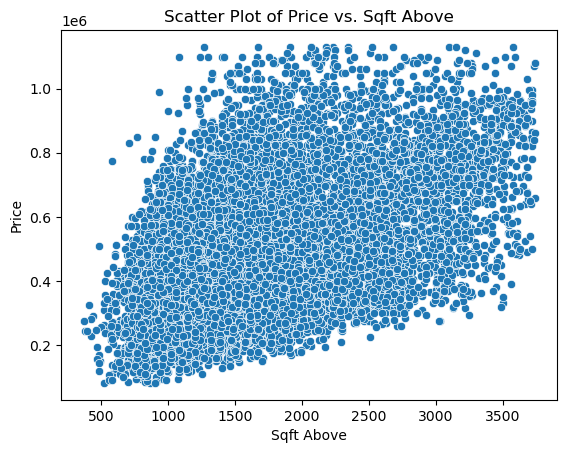

In [6]:
# Checking for linearity 
# Create scatter plot
sns.scatterplot(data=data, x='sqft_above', y='price')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Sqft Above')
plt.show()

In [7]:


# Calculating for slope and intercept
def find_slope_intercept(X, y):
    """Simple function to get the intercept and slope"""
    # Remove NaN values
    valid_indices = np.logical_and(np.isfinite(X), np.isfinite(y))
    X_valid = X[valid_indices]
    y_valid = y[valid_indices]

    # number of observations
    n = np.size(X_valid)

    # mean of X and y
    x_mean = np.mean(X_valid)
    y_mean = np.mean(y_valid)

    # calculate the cross-deviation
    SS_xy = np.sum(y_valid * X_valid) - (n * y_mean * x_mean)
    # calculating the deviation about X
    SS_xx = np.sum(X_valid * X_valid) - (n * x_mean * x_mean)

    # calculate the regression coefficients 
    slope = SS_xy / SS_xx
    intercept = y_mean - (slope * x_mean)

    return (slope, intercept)

# Call the function with 'sqft_living' as X and 'price' as y
slope, intercept = find_slope_intercept(data["sqft_above"], data["price"])
print("Slope:", slope)
print("Intercept:", intercept)



Slope: 150.4015993692753
Intercept: 219417.06767251453


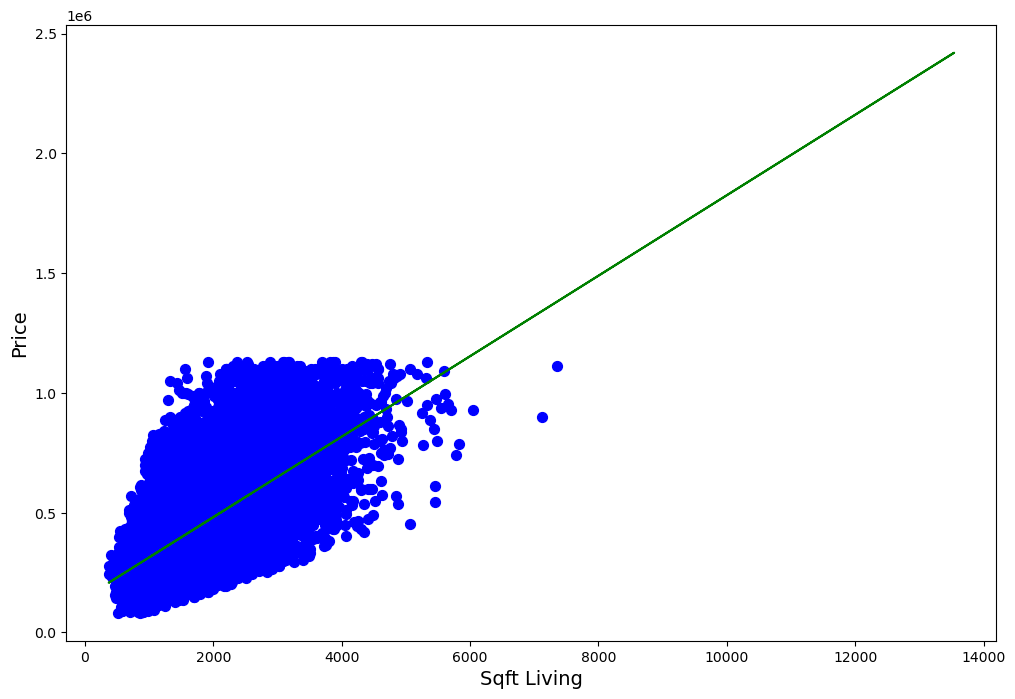

In [8]:
# Plot linear regression line
def plot_regression_line(X, y, b):
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.scatter(X, y, color="b", s=50)
    y_pred = b[1] + b[0] * X
    plt.plot(X, y_pred, color='g')
    plt.xlabel("Sqft Living", fontsize=14)
    plt.ylabel("Price", fontsize=14)
    plt.show()

b = find_slope_intercept(data["sqft_living"], data["price"])
plot_regression_line(data["sqft_living"], data["price"], b)



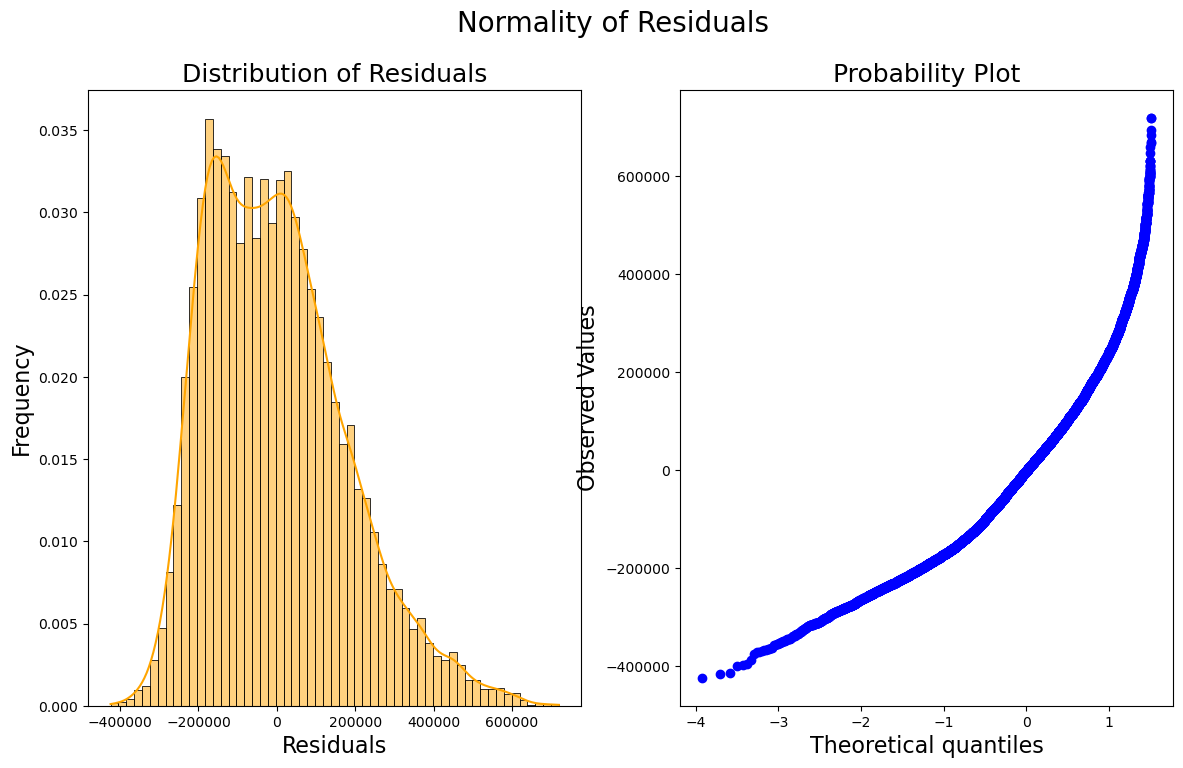

In [9]:

# Calculate the residuals for the linear regression model
data["residuals"] = data["price"] - (intercept + slope * data["sqft_above"])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Histogram of residuals
sns.histplot(data["residuals"], stat='frequency', color="orange", kde=True, ax=ax[0])
ax[0].set_ylabel("Frequency", fontsize=16)
ax[0].set_xlabel("Residuals", fontsize=16)
ax[0].set_title("Distribution of Residuals", fontsize=18)

# Q-Q plot of residuals
stats.probplot(data["residuals"], plot=ax[1])
ax[1].set_ylabel("Observed Values", fontsize=16)
ax[1].set_xlabel("Theoretical quantiles", fontsize=16)
ax[1].set_title("Probability Plot", fontsize=18)

fig.suptitle("Normality of Residuals", fontsize=20)

plt.show()


In [10]:
# Shapiro-Wilk test for normality
stat, p = stats.shapiro(data["residuals"])
print(f"statistic = {np.round(stat,3)}, p-value = {np.round(p,3)}")
alpha = 0.05
if p > alpha:
    print("Fail to reject the null hypothesis and conclude that residuals are normally distributed.")
else:
    print("Reject the null hypothesis and conclude that residuals are not normally distributed.")

statistic = nan, p-value = 1.0
Fail to reject the null hypothesis and conclude that residuals are normally distributed.


c:\Users\PC\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


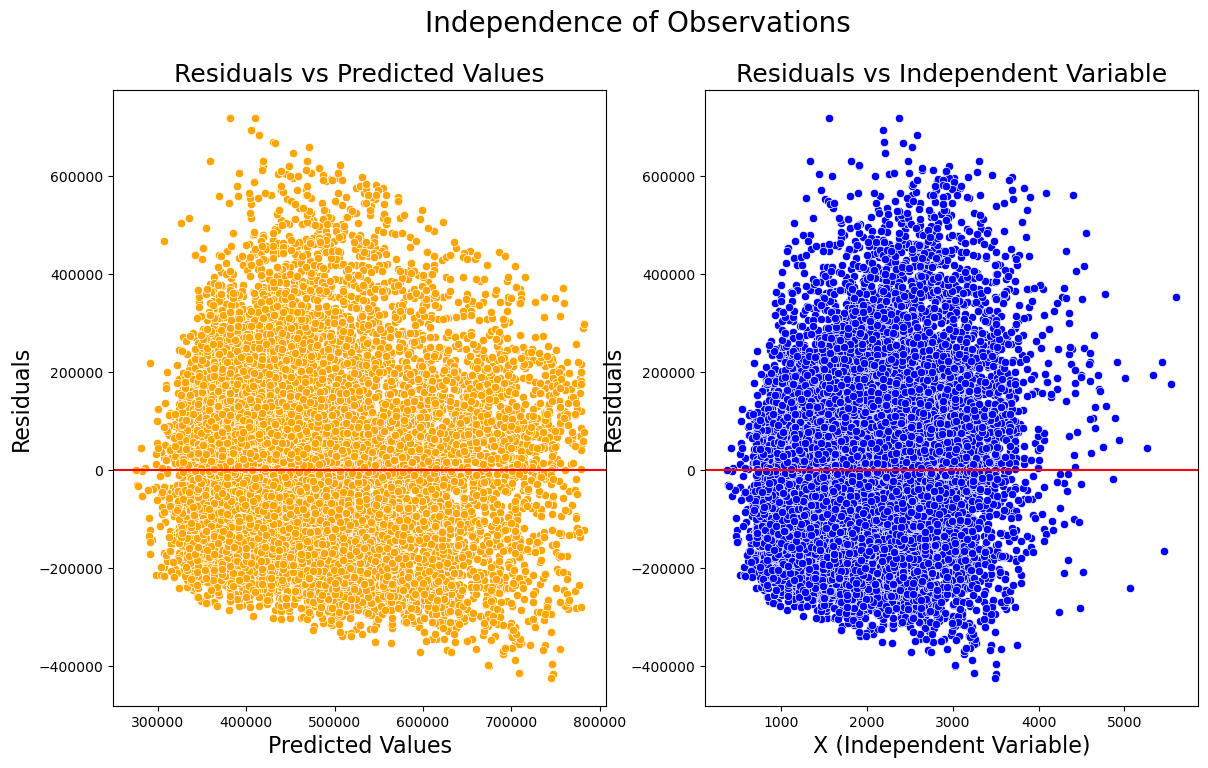

In [11]:
#checking for independence for Observations 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

data["Predicted"] = (intercept + slope * data["sqft_above"])
# Residuals vs Predicted Values
sns.scatterplot(x=data["Predicted"], y=data["residuals"], color="orange", ax=ax[0])
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set_ylabel("Residuals", fontsize=16)
ax[0].set_xlabel("Predicted Values", fontsize=16)
ax[0].set_title("Residuals vs Predicted Values", fontsize=18)

# Residuals vs Independent Variable
sns.scatterplot(x=data["sqft_living"], y=data["residuals"], color="blue", ax=ax[1])
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set_ylabel("Residuals", fontsize=16)
ax[1].set_xlabel("X (Independent Variable)", fontsize=16)
ax[1].set_title("Residuals vs Independent Variable", fontsize=18)

fig.suptitle("Independence of Observations", fontsize=20)

plt.show()


In [12]:
# Drop rows with missing values from residuals
residuals_without_missing = data["residuals"].dropna()

# Perform the Durbin-Watson test on residuals without missing values
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals_without_missing)

print("Durbin-Watson statistic:", durbin_watson_statistic)


Durbin-Watson statistic: 1.9934246140521747


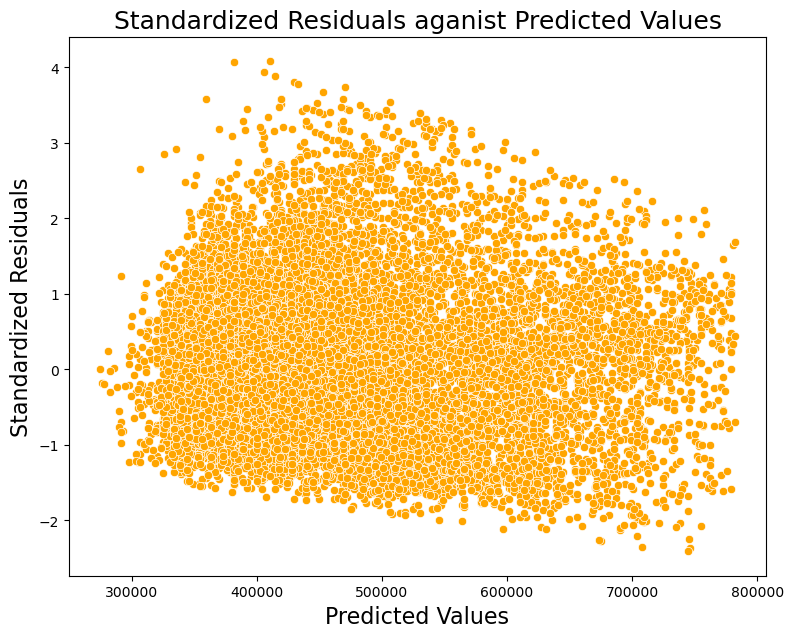

In [13]:
# Checking for Homoscedasticity
# calculate the mean and standard deviation of residuals
residuals_mean = np.mean(data["residuals"])
residuals_std = np.std(data["residuals"], ddof=1) # ddof = 1 compute the unbiased sample standard deviation

# calculate the standardized residuals
data["std_resid"] = data["residuals"] / residuals_std

# visualize
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=data["Predicted"], y=data["std_resid"], color="orange", ax=ax)
ax.set_ylabel("Standardized Residuals", fontsize=16)
ax.set_xlabel("Predicted Values", fontsize=16)
ax.set_title("Standardized Residuals aganist Predicted Values", fontsize=18)

plt.show()

In [16]:
# Remove rows with missing values
data= data.dropna()

# Remove rows with infinite values  
data= data.replace([np.inf, -np.inf], np.nan).dropna()
# Split the data into X (explanatory variable) and y (dependent variable)
X = data['sqft_above']  
y = data['price']  

# Add a constant column to X
X = sm.add_constant(X)

# Fit the simple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     4874.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:55:58   Log-Likelihood:            -1.9882e+05
No. Observations:               14729   AIC:                         3.976e+05
Df Residuals:                   14727   BIC:                         3.977e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.194e+05   3899.080     56.274      0.0

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Remove rows with missing values
data = data.dropna()

# Remove rows with infinite values  
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Split the data into X (explanatory variable) and y (dependent variable)
X = data['sqft_above'].values.reshape(-1, 1)  
y = data['price'].values 

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate the MSE
mse = mean_squared_error(y, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 176255.0214255919


In [ ]:
# Split the data into X (explanatory variable) and y (dependent variable)
X = data['sqft_above']  
y = data['price']  

# Add a constant column to X
X = sm.add_constant(X)

# Fit the simple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Calculate R-squared
R_squared = results.rsquared

# Calculate adjusted R-squared
n = len(y)
k = X.shape[1] - 1  # Subtracting 1 to exclude the intercept
adjusted_R_squared = 1 - (1 - R_squared) * (n - 1) / (n - k - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_R_squared)


Adjusted R-squared: 0.24862664254552724


In [ ]:
#Checking for outliers in 'sqft_living'
# Calculate Q1 and Q3
q1 = data['sqft_living'].quantile(0.25)
q3 = data['sqft_living'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(data['sqft_living'])/(len(data['sqft_living']) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(data['sqft_living'])/(len(data['sqft_living']) + 1)))

# Identify the outliers
outliers = data['sqft_living'][(data['sqft_living'] < lower_bound) | (data['sqft_living'] > upper_bound)]

# Print the outliers
print(outliers.to_list())

# remove outliers from the data 
data['sqft_living'] = data['sqft_living'][~((data['sqft_living'] < lower_bound) | (data['sqft_living'] > upper_bound))]

sqft_living_length = len(data['sqft_living'])
print("Length of 'sqft_living' column after removing outliers:", sqft_living_length)


[4220, 4770, 3950, 3960, 4090, 4410, 4040, 4870, 4390, 4610, 4380, 4210, 3990, 4470, 4350, 4250, 4700, 4120, 4020, 4300, 4100, 5010, 4660, 3940, 4270, 3930, 4180, 4080, 4660, 4300, 4060, 4050, 4110, 4350, 4090, 4360, 4940, 5440, 4030, 4650, 4530, 4330, 5067, 5270, 4060, 4500, 4530, 3970, 4020, 4480, 5545, 4600, 4060, 4320, 4140, 4250, 5461, 4060, 3990, 3950, 4500, 4360, 4010, 4690, 3990, 4300, 4340, 4550, 4790, 4060, 4340, 4160, 4410, 4320, 4040, 4420, 4600, 4060, 4300, 5600, 4400, 4590, 3960, 3990, 4240, 4720, 4510, 4430, 4230, 3990, 4920, 3970, 4370, 4440, 4520, 4140, 4600, 4890, 4630, 3931, 5330, 4420, 4490, 4320, 4220, 4420, 4600, 4210, 4490, 4750, 3990, 4040, 4450, 4170]
Length of 'sqft_living' column after removing outliers: 14729


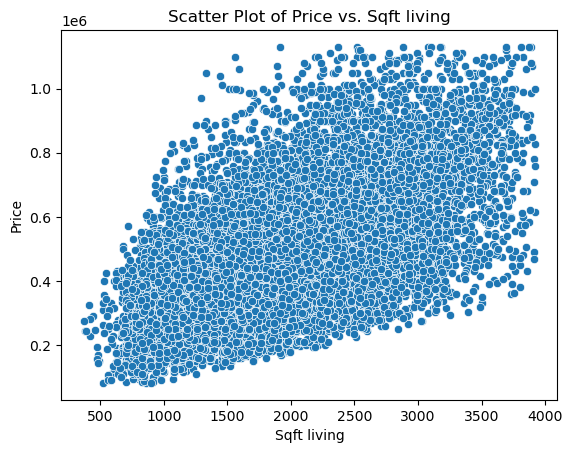

In [ ]:
# Checking for linearity 
# Create scatter plot
sns.scatterplot(data=data, x='sqft_living', y='price')
plt.xlabel('Sqft living')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Sqft living')
plt.show()

In [ ]:
#Checking for outliers in 'sqft_living15'
# Calculate Q1 and Q3
q1 = data['sqft_living15'].quantile(0.25)
q3 = data['sqft_living15'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# using a dynamic multiplier instead of using a fixed multiplier eg 1.5
lower_bound = q1 - (1.5 * iqr * (len(data['sqft_living15'])/(len(data['sqft_living15']) + 1)))
upper_bound = q3 + (1.5 * iqr * (len(data['sqft_living15'])/(len(data['sqft_living15']) + 1)))

# Identify the outliers
outliers = data['sqft_living15'][(data['sqft_living15'] < lower_bound) | (data['sqft_living15'] > upper_bound)]

# Print the outliers
print(outliers.to_list())

# remove outliers from the data 
data['sqft_living15'] = data['sqft_living15'][~((data['sqft_living15'] < lower_bound) | (data['sqft_living15'] > upper_bound))]

sqft_living15_length = len(data['sqft_living15'])
print("Length of 'sqft_living15' column after removing outliers:", sqft_living15_length)



[3625, 3530, 3740, 3920, 3480, 3630, 3480, 3680, 3600, 3460, 3820, 3540, 3720, 3510, 3720, 3900, 3460, 3910, 3450, 3730, 3600, 3520, 3490, 3640, 3620, 3620, 3490, 3490, 3770, 4090, 3630, 3460, 3510, 3470, 3480, 3450, 3920, 3680, 3500, 4240, 3639, 3540, 3470, 3450, 3490, 3670, 3630, 4160, 3490, 3640, 3500, 3500, 4100, 3630, 3460, 3790, 3710, 3990, 4340, 3470, 3530, 3700, 3840, 3850, 3490, 3800, 3715, 3520, 3610, 3470, 3543, 3610, 3650, 3550, 3740, 3680, 3490, 3450, 3480, 3700, 3610, 3625, 3930, 3568, 3590, 3810, 3740, 3625, 3470, 3540, 4340, 3480, 4080, 3890, 4010, 3610, 3470, 3960, 3750, 3730, 3580, 3750, 3530, 3630, 3510, 3830, 3580, 3680, 3900, 4370, 3515, 3540, 3540, 4050, 3630, 4950, 3460, 4070, 3730, 3530, 3520, 3620, 3950, 3730, 3740, 3540, 3600, 3550, 3450, 3620, 3520, 3740, 3870, 3680, 3540, 3670, 3610, 3650, 3450, 4040, 3460, 4100, 4180, 3550, 3460, 3500, 3670, 3470, 3800, 3490, 3920, 3660, 3510, 3820, 3560, 4100, 3480, 3920, 3530, 3740, 3540, 3530, 3490, 3530, 3640, 3620, 370

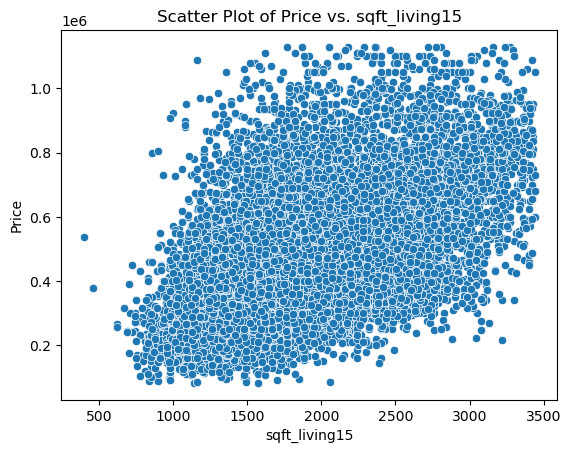

In [ ]:
# Checking for linearity 
# Create scatter plot
sns.scatterplot(data=data, x='sqft_living15', y='price')
plt.xlabel('sqft_living15')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. sqft_living15')
plt.show()

In [ ]:
# creating a multiple linear regression

# Remove rows with missing values
data = data.dropna()

# Remove rows with infinite values  
data = data.replace([np.inf, -np.inf], np.nan).dropna()

X = data[['sqft_above','sqft_living','sqft_living15']]  # Replace with your actual columns
y = data['price']  # Replace with your actual column

# Add a constant column to X
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     2618.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        05:06:45   Log-Likelihood:            -1.9327e+05
No. Observations:               14426   AIC:                         3.865e+05
Df Residuals:                   14422   BIC:                         3.866e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.157e+04   4796.332     19.093

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF and tolerance
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["tolerance"] = 1 / vif["VIF"]
    return vif

vif = calc_vif(X)
print(vif)

       variables        VIF  tolerance
0          const  13.080227   0.076451
1     sqft_above   3.327814   0.300498
2    sqft_living   3.606970   0.277241
3  sqft_living15   2.129253   0.469648


Above is a model which aims to predict house prices. There was mainly use of linear regression model bacause most of the variables affect the price.The target variable (price) has strong relationship with the independent variables which help the model to be able to predict future prices.The model can moderately predict the prices as noted by the adjusted R^2 ,VIF and toleance